In [14]:
from datasets import *
from models import *

In [15]:
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable

In [16]:
import matplotlib.pyplot as plt

In [17]:
cuda = True if torch.cuda.is_available() else False

In [18]:
#Global Variables
CHANNELS = 3
IMG_SIZE = 128
DATASET_NAME = 'img_align_celeba'
BATCH_SIZE = 8
N_CPU = 4
MASK_SIZE = 64

In [19]:
generator = Generator(channels=CHANNELS)
discriminator = Discriminator(channels=CHANNELS)

In [24]:
print("Loading saved models")
generator = torch.load(os.path.join( './models/gen.pt'),map_location=torch.device('cpu'))
discriminator =  torch.load(os.path.join('./models/disc.pt'),map_location=torch.device('cpu'))
print("modles loaded")

Loading saved models
modles loaded


In [25]:
if cuda:
    generator.cuda()
    discriminator.cuda()

In [28]:
# Dataset loader
transforms_ = [
    transforms.Resize((IMG_SIZE, IMG_SIZE), Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
]
dataloader = DataLoader(
    ImageDataset("../../Desktop/PyTorch-GAN/data/%s" % DATASET_NAME, transforms_=transforms_),
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=N_CPU,
)
test_dataloader = DataLoader(
    ImageDataset("../../Desktop/PyTorch-GAN/data/%s" % DATASET_NAME, transforms_=transforms_, mode="val"),
    batch_size=1,
    shuffle=True,
    num_workers=1,
)

In [29]:
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

In [37]:
def save_sample():
    samples, masked_samples, i = next(iter(test_dataloader))
    samples = Variable(samples.type(Tensor))
    masked_samples = Variable(masked_samples.type(Tensor))
    i = i[0].item()  # Upper-left coordinate of mask
    # Generate inpainted image
    gen_mask = generator(masked_samples)
    filled_samples = masked_samples.clone()
    filled_samples[:, :, i : i + MASK_SIZE, i : i + MASK_SIZE] = gen_mask
    # Save sample
    sample = torch.cat((masked_samples.data, filled_samples.data, samples.data), -2)
    return sample

In [38]:
result = save_sample().cpu().squeeze().permute(1,2,0)

In [39]:
result

tensor([[[ 0.1294,  0.0431, -0.0039],
         [ 0.2000,  0.1137,  0.0667],
         [ 0.3098,  0.2235,  0.1686],
         ...,
         [-0.0510,  0.2078,  0.5451],
         [-0.2314,  0.0196,  0.3961],
         [-0.2706, -0.0275,  0.3961]],

        [[ 0.1216,  0.0353, -0.0118],
         [ 0.1922,  0.1059,  0.0588],
         [ 0.2941,  0.2078,  0.1608],
         ...,
         [ 0.2157,  0.4745,  0.8196],
         [ 0.1059,  0.3569,  0.7412],
         [-0.0196,  0.2235,  0.6392]],

        [[ 0.1059,  0.0196, -0.0275],
         [ 0.1686,  0.0824,  0.0353],
         [ 0.2706,  0.1843,  0.1373],
         ...,
         [ 0.3882,  0.6314,  0.9843],
         [ 0.3020,  0.5451,  0.9294],
         [ 0.0980,  0.3412,  0.7647]],

        ...,

        [[ 0.2784,  0.1059, -0.0667],
         [ 0.2235,  0.0510, -0.1294],
         [ 0.1373, -0.0353, -0.2235],
         ...,
         [-0.0275, -0.1922, -0.3569],
         [-0.1843, -0.3098, -0.4667],
         [-0.2471, -0.3412, -0.4824]],

        [[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


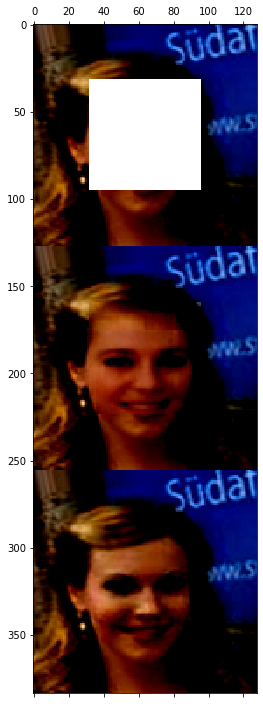

In [40]:
plt.matshow(result)
plt.show() 